# Спектральная кластеризация

## Теория

Спектральная кластеризация — это метод кластеризации, основанный на анализе спектра (собственных значений) матрицы, описывающей связи между объектами. Обычно применяется для задачи кластеризации графов или данных, где отношения между объектами можно представить в виде графа.

Пусть у нас есть взвешенный неориентированный граф $G = (V, E)$, где:
- $V = \{v_1, v_2, \dots, v_n\}$ — множество вершин;
- $E$ — множество рёбер;

### Шаг 1: Построение матрицы смежности
Создайте матрицу смежности $W$, описывающую связи между объектами. Вес $w_{ij}$ может быть задан разными способами, например:

- **Граф $\epsilon$-окрестности:**
$$
w_{ij} = \begin{cases} 1, & \text{если } \|x_i - x_j\| \leq \epsilon, \\
0, & \text{иначе} \end{cases} \\
$$
В этом графе соединяются все точки, расстояние между которыми меньше $\epsilon$. Так как расстояния между всеми соединёнными точками находятся в пределах $\epsilon$, граф обычно рассматривается как невзвешенный.

- **Граф $k$ ближайших соседей:**
Вершина $v_i$ соединяется с вершиной $v_j$, если $v_j$ является одним из $k$ ближайших соседей $v_i$. Данная схема приводит к направленному графу, так как отношение соседства несимметрично (это можно исправить).

- **Полносвязный граф:**
Все точки соединяются рёбрами, взвешенными по функции сходства $s_{ij}$. Полносвязный граф полезен, если функция сходства моделирует локальные окрестности, например, при использовании гауссовой функции сходства:
$$
s(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right),
$$

### Шаг 2: Построение лапласиана

Матрица степеней $D$ — это диагональная матрица, где $D_{ii} = d_i = \sum_{j=1}^n w_{ij}.$

**Лапласиан графа $L$** определяется как:
$$
L = D - W.
$$

Матрица $L$ удовлетворяет следующим свойствам:

1. Для любого вектора $( f \in \mathbb{R}^n )$ выполняется
   $f^T L f = \frac{1}{2} \sum_{i,j=1}^{n} w_{ij} (f_i - f_j)^2$

2. Матрица $L$ симметрична и положительно полуопределённая.

3. Наименьшее собственное значение матрицы $L$ равно 0, соответствующий собственный вектор — это вектор, состоящий из единиц.

4. У матрицы $L$ есть $n$ неотрицательных, вещественных собственных значений:
   $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_n$


**Нормализованный лапласиан** определяется как:
$$
L_{sym} = D^{-\frac{1}{2}} L D^{-\frac{1}{2}} = I - D^{-\frac{1}{2}} W D^{-\frac{1}{2}},
$$
где $I$ — единичная матрица.

Альтернативная форма нормализованного лапласиана:
$$
L_{rw} = D^{-1} L = I - D^{-1} W.
$$

Нормализованные лапласианы удовлетворяют следующим свойствам:

1. Для любого вектора $f \in \mathbb{R}^n$ выполняется:
   $$
   f^T L_{\text{sym}} f = \frac{1}{2} \sum_{i,j=1}^{n} w_{ij} \left( \frac{f_i}{\sqrt{d_i}} - \frac{f_j}{\sqrt{d_j}} \right)^2
   $$

2. Если $\lambda$ — собственное значение матрицы $L_{\text{rw}}$ с собственным вектором $u$, то и $\lambda$ будет собственным значением матрицы $L_{\text{sym}}$ с собственным вектором $w = D^{1/2} u$.

3. Если $\lambda$ — собственное значение матрицы $L_{\text{rw}}$ с собственным вектором $u$, то и $\lambda$ и $u$ удовлетворяют обобщённой собственной задаче:
   $$
   L u = \lambda D u.
   $$

4. 0 — собственное значение матрицы $L_{\text{rw}}$, а соответствующий собственный вектор — это вектор, состоящий из единиц. 0 — собственное значение матрицы $L_{\text{sym}}$, а соответствующий собственный вектор — это вектор $D^{1/2}$.

5. Матрицы $L_{\text{sym}}$ и $L_{\text{rw}}$ положительно полуопределённые и имеют $n$ неотрицательных вещественных собственных значений:
   $$
   0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_n.
   $$

### Шаг 3: Вычисление собственных векторов
Найдите $k$ собственных векторов нормализованного лапласиана, соответствующих $k$ наименьшим собственным значениям. Эти векторы образуют матрицу $U \in \mathbb{R}^{n \times k}$.

### Шаг 4: Формирование новых признаков
Для формирования матрицы $T$, которая представляет новое признаковое пространство, можно воспользоваться строками матрицы $U$. При этом строки $U$ можно предварительно нормализовать:
$$
T_{ij} = \frac{U_{ij}}{\sqrt{\sum_{j=1}^k U_{ij}^2}}.
$$

### Шаг 5: Применение алгоритма кластеризации
Примените алгоритм $k$-средних к строкам матрицы $T$ для получения кластеров.

## Интуиция
Идея спектральной кластеризации заключается в том, что собственные векторы нормализованного лапласиана кодируют информацию о структуре графа. Минимизация энергии разреза графа достигается за счёт использования первых $k$ собственных векторов, что соответствует разделению графа на $k$ кластеров.

## Статья
https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf

## Тестирование

### Подключение библиотек

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

### Создание тестов

In [ ]:
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

In [ ]:
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [ ]:
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

### Параметры моделей

In [ ]:
default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

### Проверка моделей 1

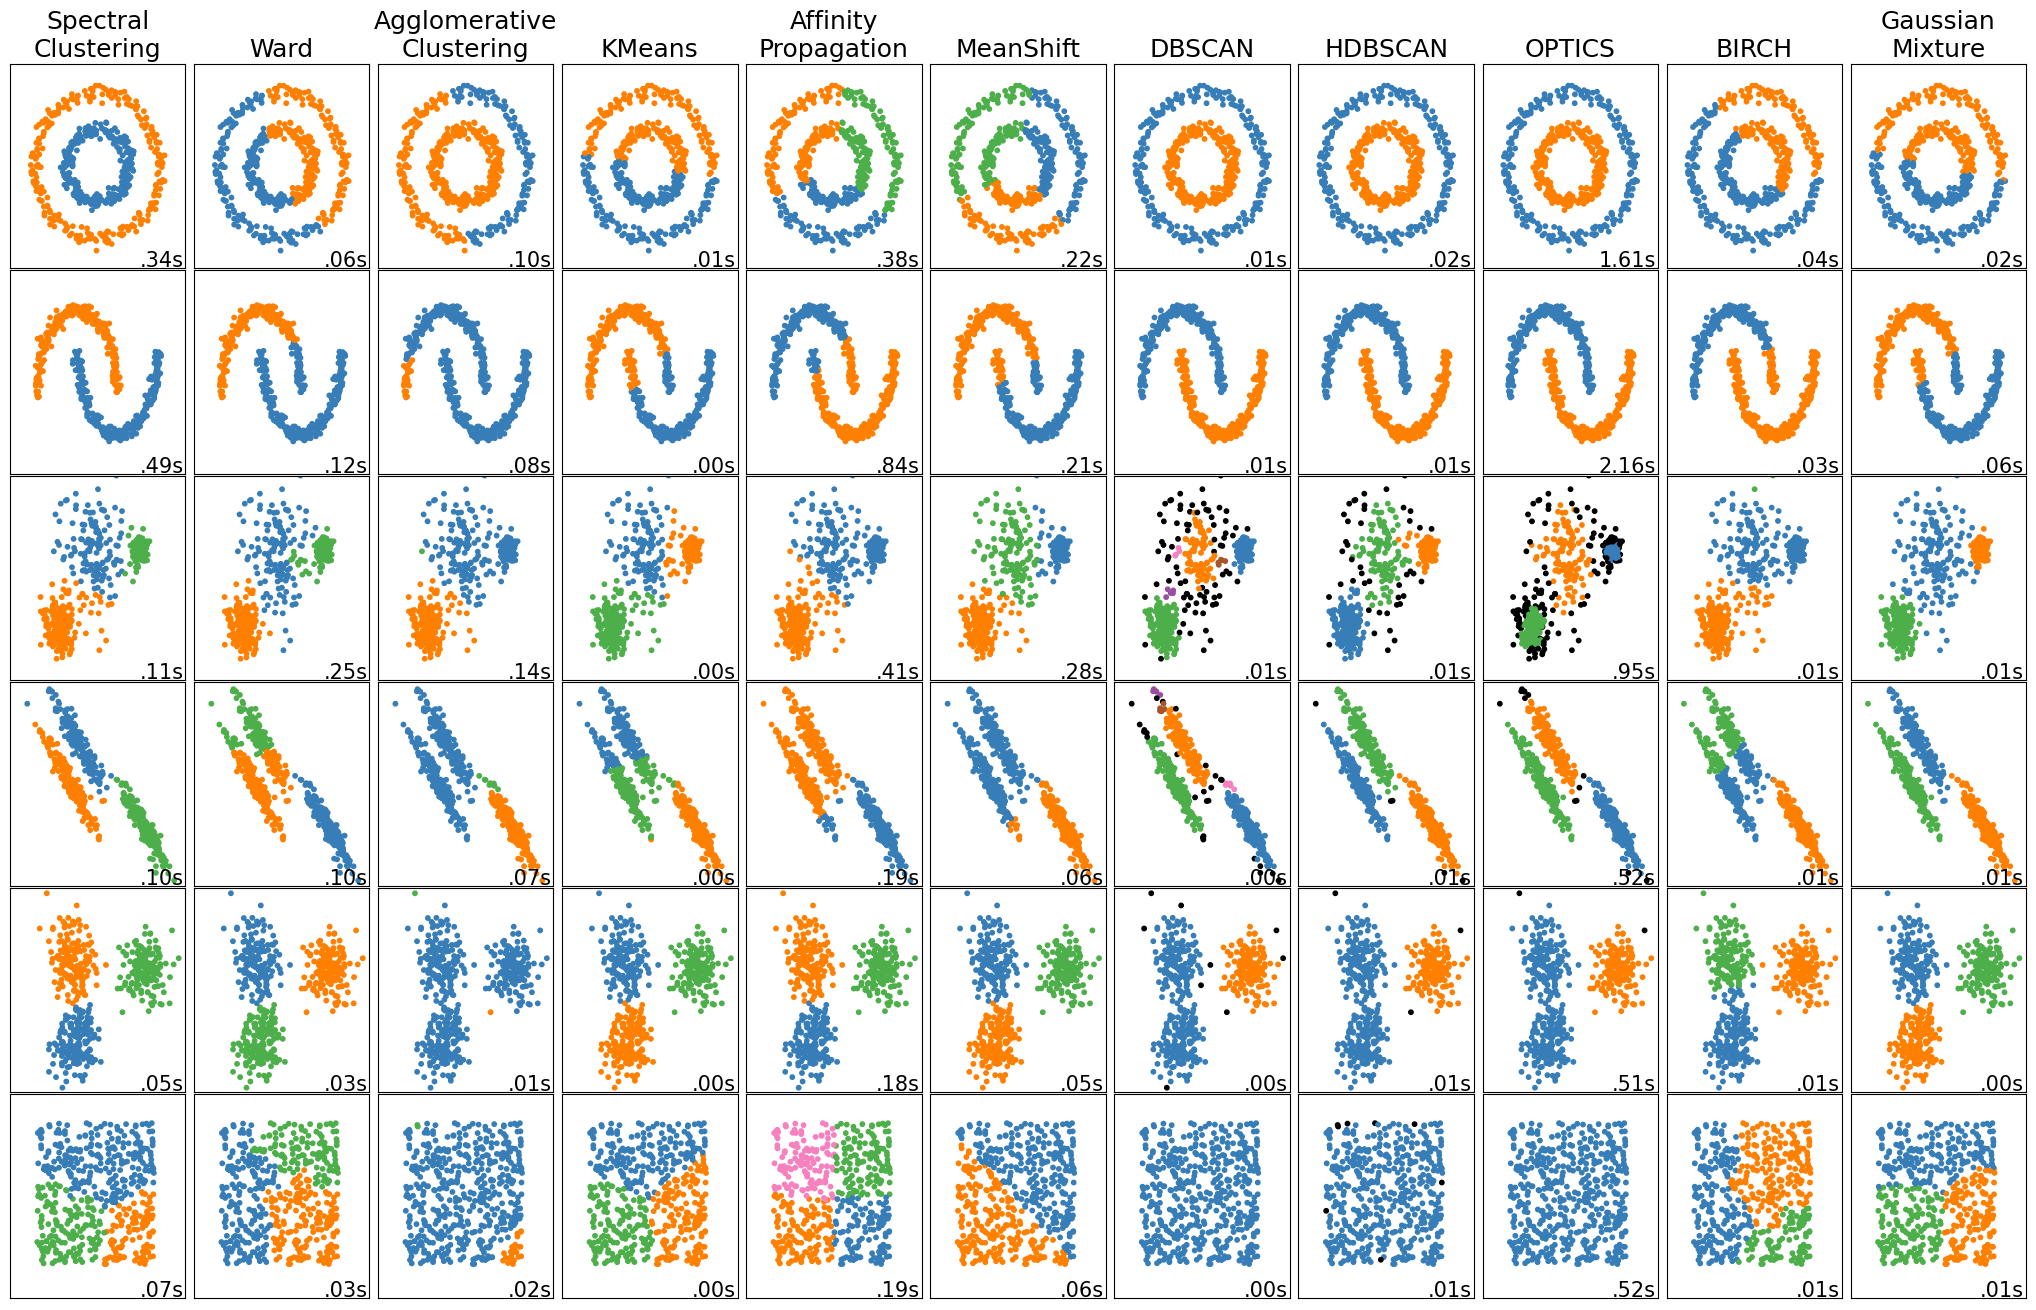

In [ ]:
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

for i_dataset, (dataset, algo_params) in enumerate(datasets):

    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

    kmeans = cluster.KMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )

    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )

    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )

    dbscan = cluster.DBSCAN(eps=params["eps"])

    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )

    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )

    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )

    birch = cluster.Birch(n_clusters=params["n_clusters"])

    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("KMeans", kmeans),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

### Скачивание и обработка датасета

In [ ]:
import kagglehub

path = kagglehub.dataset_download("joonasyoon/clustering-exercises")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/joonasyoon/clustering-exercises/versions/9


In [ ]:
!ls -s /root/.cache/kagglehub/datasets/joonasyoon/clustering-exercises/versions/9

total 7396
380 basic1.csv	288 box.csv	284 dart.csv	    104 network.csv    92 spirals.csv
124 basic2.csv	440 boxes2.csv	 56 face.csv	     36 outliers.csv  416 supernova.csv
220 basic3.csv	840 boxes3.csv	 72 hyperplane.csv   44 ring.csv       24 triangle.csv
488 basic4.csv	352 boxes.csv	 20 isolation.csv    20 sparse.csv    244 un2.csv
156 basic5.csv	432 chrome.csv	240 lines2.csv	    364 spiral2.csv   232 un.csv
160 blob.csv	264 dart2.csv	160 lines.csv	    348 spiral.csv    496 wave.csv


In [ ]:
import os
import pandas as pd

directory = "/root/.cache/kagglehub/datasets/joonasyoon/clustering-exercises/versions/9"

datasets = []

for file_name in os.listdir(directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(directory, file_name)
        df = pd.read_csv(file_path)

        if {'x', 'y', 'color'}.issubset(df.columns):

            X = df[['x', 'y']].values.tolist()
            color = df['color'].values

            n_clusters = len(np.unique(color))
            datasets.append(
                (
                    (np.array(X), np.array(color)),
                    {
                        "n_clusters": n_clusters,
                        "n_neighbors": 3,
                        "quantile": 0.3,
                        "eps": 0.3,
                        "damping": 0.9,
                        "preference": -200,
                        "min_samples": 7,
                        "xi": 0.05,
                        "min_cluster_size": 0.1,
                        "allow_single_cluster": True,
                        "hdbscan_min_cluster_size": 15,
                        "hdbscan_min_samples": 3,
                        "random_state": 42,
                    },
                )
            )

### Проверка моделей 2

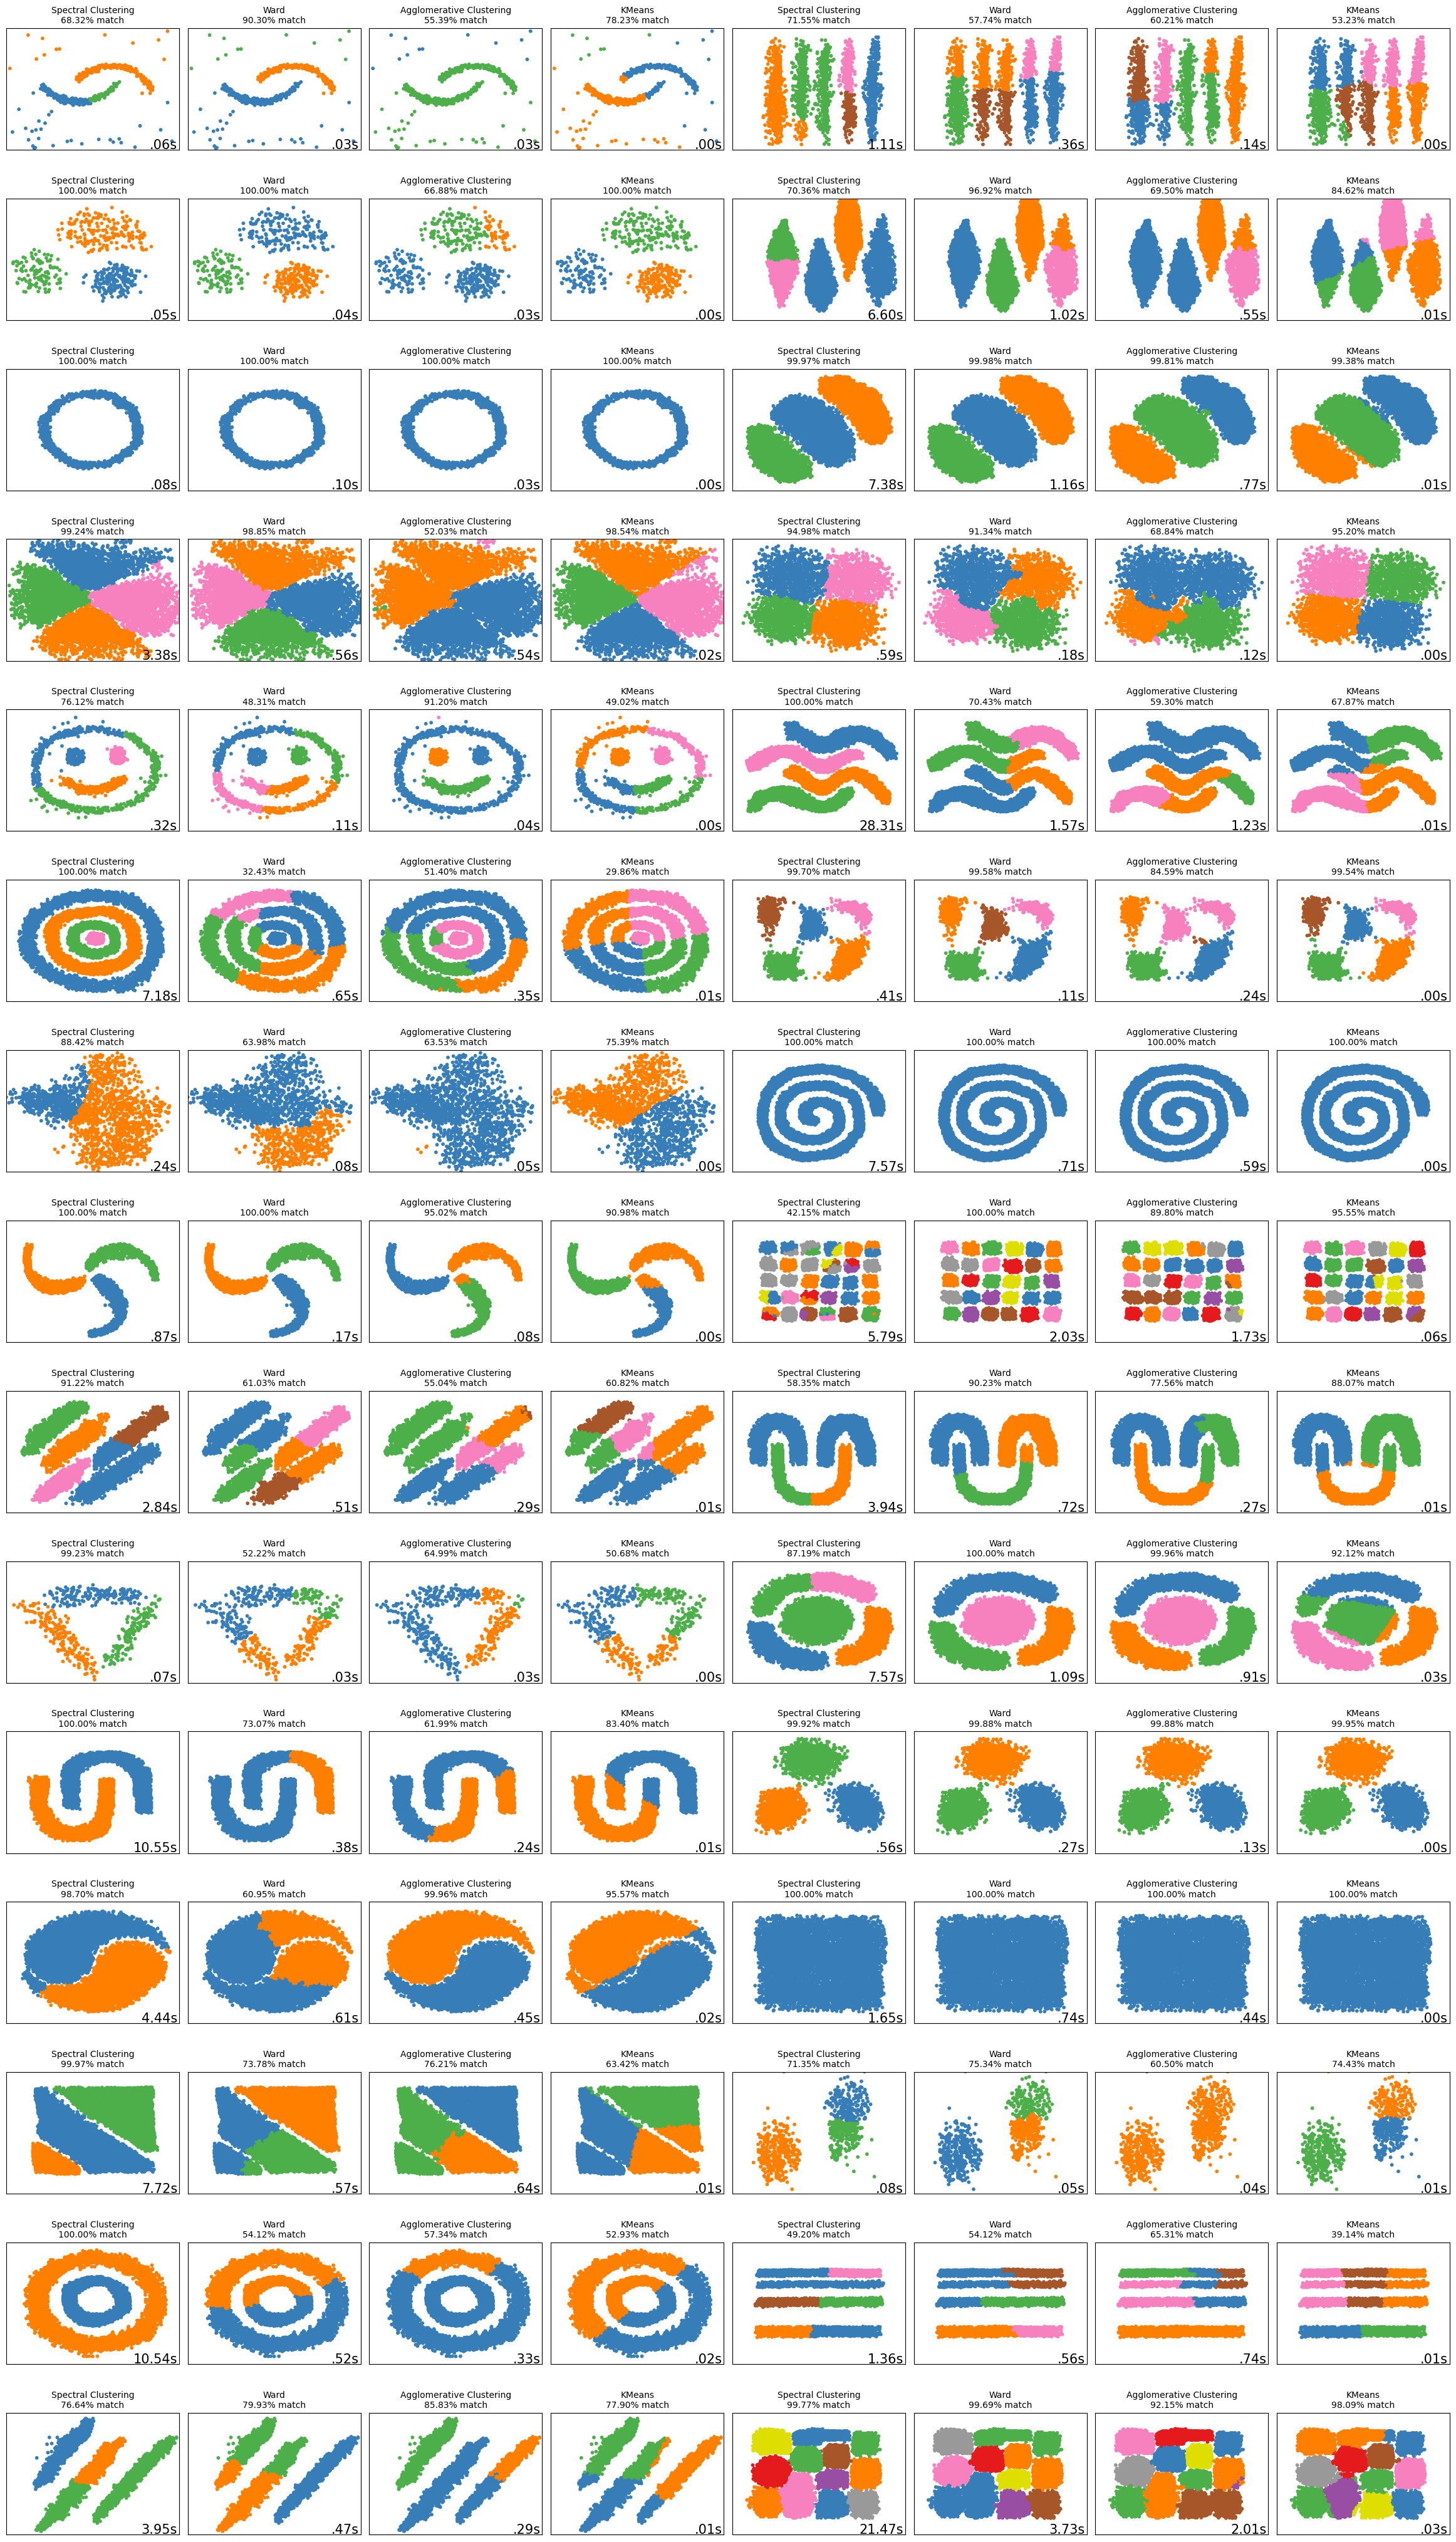

In [ ]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import time
import warnings
from sklearn import cluster

# Function to calculate matching score
def calculate_matching_score(y_true, y_pred):
    unique_true = np.unique(y_true)
    unique_pred = np.unique(y_pred)

    cost_matrix = np.zeros((len(unique_true), len(unique_pred)))
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            cost_matrix[i, j] = np.sum((y_true == true_label) & (y_pred == pred_label))

    row_ind, col_ind = linear_sum_assignment(cost_matrix, maximize=True)

    matching_count = cost_matrix[row_ind, col_ind].sum()

    return matching_count / len(y_true) * 100

# Prepare data for visualization
n_cols = 8
n_rows = int(np.ceil(len(datasets) * len(clustering_algorithms) / n_cols))

plt.figure(figsize=(n_cols * 3, n_rows * 3))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.05, hspace=0.4)

# Collect results
match_scores = {"Spectral Clustering": [], "Ward": [], "Agglomerative Clustering": [], "KMeans": []}
time_scores = {"Spectral Clustering": [], "Ward": [], "Agglomerative Clustering": [], "KMeans": []}

plot_num = 1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=algo_params["n_neighbors"], include_self=False)
    connectivity = 0.5 * (connectivity + connectivity.T)

    spectral = cluster.SpectralClustering(
        n_clusters=algo_params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=algo_params['random_state'],
    )

    ward = cluster.AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="ward", connectivity=connectivity
    )

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=algo_params["n_clusters"],
        connectivity=connectivity,
    )

    kmeans = cluster.KMeans(n_clusters=algo_params["n_clusters"], random_state=42)

    clustering_algorithms = (
        ("Spectral Clustering", spectral),
        ("Ward", ward),
        ("Agglomerative Clustering", average_linkage),
        ("KMeans", kmeans),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        matching_score = calculate_matching_score(y, y_pred)
        execution_time = t1 - t0

        # Store results
        match_scores[name].append(matching_score)
        time_scores[name].append(execution_time)

        plt.subplot(n_rows, n_cols, plot_num)
        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % execution_time).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plt.title(f"{name}\n{matching_score:.2f}% match", size=10)
        plot_num += 1

plt.show()

### Сравнение точности и времени

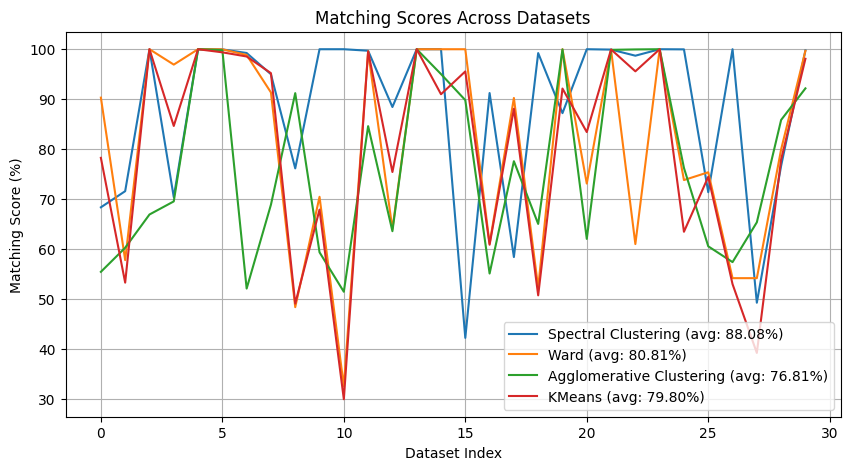

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))

# Plot match scores
for name, scores in match_scores.items():
    plt.plot(scores, label=f"{name} (avg: {np.mean(scores):.2f}%)")

plt.title("Matching Scores Across Datasets")
plt.xlabel("Dataset Index")
plt.ylabel("Matching Score (%)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot execution times
plt.figure(figsize=(10, 5))
for name, times in time_scores.items():
    plt.plot(times, label=f"{name} (avg: {np.mean(times):.2f}s)")

plt.title("Execution Times Across Datasets")
plt.xlabel("Dataset Index")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid()
plt.show()

## Выводы

###Преимущества:

- **Гибкость в разделении сложных структур**: Спектральная кластеризация хорошо справляется с данными, имеющими сложные и нелинейные формы кластеров. Это особенно важно, если данные не могут быть разделены с использованием простых геометрических фигур, таких как сферы или эллипсы.
- **Использование графов**: Метод использует графовую модель, что позволяет учитывать более сложные взаимосвязи между объектами. Это делает его особенно эффективным для кластеризации данных, представленных в виде графов (например, социальные сети, молекулы, географические данные и др.).
- **Теоретическая обоснованность**: Спектральная кластеризация основана на анализе собственных векторов и значений матрицы смежности графа, что предоставляет сильное теоретическое обоснование для метода.
- **Устойчивость к шуму**: В некоторых случаях спектральная кластеризация может быть более устойчивой к шуму, чем традиционные методы, такие как k-средних, особенно в случае кластеров, которые могут перекрывать друг друга или имеют сложные формы.
- **Применимость к нерегулярным данным**: Метод отлично работает с данными, которые имеют нестандартные геометрические структуры, такие как данные с "кривыми" или с узкими, вытянутыми структурами.

###  Недостатки:

- **Зависимость от параметров**: Результаты кластеризации сильно зависят от выбора метрики (например, гауссового ядра для построения матрицы смежности) и числа кластеров, что может потребовать дополнительных усилий для настройки.
- **Вычислительная сложность**: Спектральная кластеризация требует вычисления собственных значений и векторов для большой матрицы смежности, что может быть довольно дорогим с точки зрения вычислений, особенно при работе с большими наборами данных.
- **Проблемы с масштабированием**: Алгоритм может плохо масштабироваться при увеличении объема данных, так как время работы значительно возрастает при большом числе точек.